# Project Q3

Load tenure year - amount of time to repay the loan<br>
Number of dependent - number of people who are in your immediate family<br>
joint application - credit profiles of both you and the co-applicant are taken into account and both applicants are resposible for replaying the loan<br>
score - the higher the score, the better a borrower looks to potential lenders<br>

In [ ]:
pip install imblearn

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
from sklearn.metrics import roc_auc_score
from sklearn import svm, tree
from sklearn import metrics
from imblearn.over_sampling import RandomOverSampler

In [2]:
#read csv
file = pd.read_csv("Bank_CreditScoring.csv")

In [3]:
mean_loan = file["Loan_Amount"].mean()
mean_loan

448350.1208510638

The mean of loan amount of all loaners is 448350

In [4]:
side_income = file["Number_of_Side_Income"].max()
side_income


3

The maximum number of side income in the given dataset is 3

In [5]:
median_score = file["Score"].median()
median_score

8.0

Median of the score is 8

Text(0, 0.5, 'Frequency')

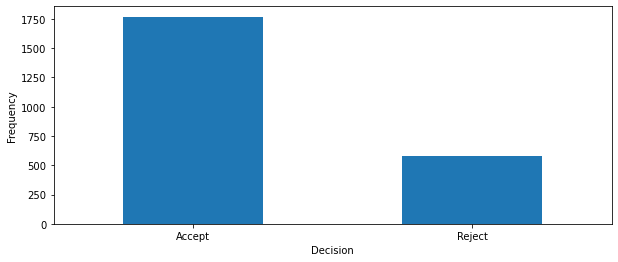

In [6]:
file["Decision"].value_counts().sort_index().plot(figsize = (10,4),kind = "bar",rot = 0)
plt.xlabel("Decision")
plt.ylabel("Frequency")


The bar chart shows that the frequency of the accept is more than reject. Hence, this dataset is imbalanced.

Text(0.5, 1.0, 'Frequency of type of employment')

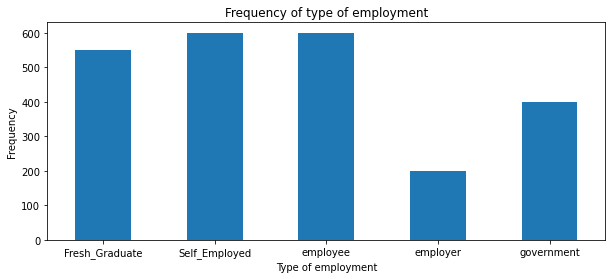

In [7]:
file["Employment_Type"].value_counts().sort_index().plot(figsize = (10,4),kind = "bar",rot = 0)
plt.xlabel("Type of employment")
plt.ylabel("Frequency")
plt.title("Frequency of type of employment")


There are 5 type of employments in the dataset, which is fresh graduate, self employed,employee,employer and government.<br>
As we can see from the graph, the number of self employed and employee have the highest amount.

<AxesSubplot:>

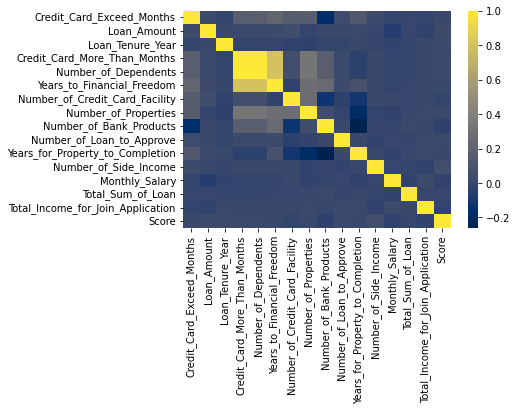

In [8]:
sns.heatmap(file.corr(),cmap="cividis")

As we can see from the heatmap, there is a strong correlation of credit card more than months and number of dependents

In [9]:
num = input('Enter your k- value')


Enter your k- value 3


# **Clustering**

In [10]:
from sklearn.cluster import KMeans 

X = file.drop('Score',axis = 1)
y = file['Score']#Classification need to be classes

X = pd.get_dummies(X,drop_first = True)


In [11]:
k_mean_selection = [2,3,5]
for i in range(3):
    newData = pd.read_csv("Bank_CreditScoring.csv")
    KM = KMeans(n_clusters = k_mean_selection[i],random_state = 12)
    KM.fit(X)
    label = KM.predict(X)

    newData['Label']=label
    newData.to_csv('K_mean_' + str(k_mean_selection[i]) + '.csv',index= False)


In [ ]:
# class_count_Accept,class_count_Reject = file['Decision'].value_counts()

In [ ]:
# class_A = file[file['Decision'] == 'Accept']
# class_D = file[file['Decision'] == 'Reject']# print the shape of the class
# print('class A:', class_A.shape)
# print('class D:', class_D.shape)

In [ ]:
# class_A_under = class_A.sample(class_count_Reject)
# test_under = pd.concat([class_A_under,class_D],axis = 0)

# print("total class of accept and reject ",test_under['Decision'].value_counts())
# test_under['Decision'].value_counts().plot(kind='bar', title='count (target)')

# **Classification Problem 1**


In [12]:
newFile = pd.read_csv("K_mean_"+str(num) + ".csv")

In [13]:
oversample = RandomOverSampler(sampling_strategy = 'minority')

In [14]:
X = newFile.drop('Decision',axis = 1)
y = newFile['Decision']
X = pd.get_dummies(X, drop_first=True) 

X_over,y_over = oversample.fit_resample(X,y)

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,test_size = 0.3,random_state = 42)

Recall: 0.8683729433272395
Accuracy score: 0.8709981167608286
F1 score: 0.8739650413983441
roc_auc_score 0.933597202747555


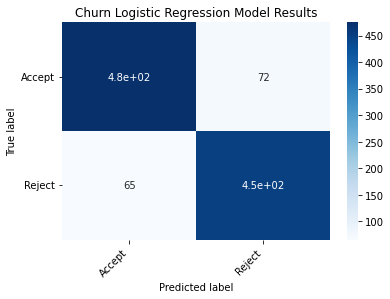

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
clf=RandomForestClassifier()
#n_estimators=800, criterion='gini', max_depth=None,min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None,bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False,class_weight=None
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
prob_y_2 = clf.predict_proba(X_test)
prob_y_2 = [p[1] for p in prob_y_2]
print('Recall:',recall_score(y_test, y_pred,pos_label = "Accept"))
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred,pos_label = "Accept"))
print('roc_auc_score',roc_auc_score(y_test,prob_y_2 ) )

conmat = confusion_matrix(y_test, y_pred)
val = np.mat(conmat) 

classnames = list(set(y_train))

df_cm = pd.DataFrame(

        val, index=classnames, columns=classnames, 

    )
plt.figure()

heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')

plt.xlabel('Predicted label')

plt.title('Churn Logistic Regression Model Results')

plt.show()  

Accuracy score: 0.519774011299435
roc_auc_score 0.54062938180011


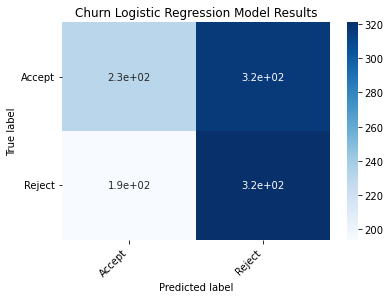

In [17]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
y_predGB = nb.predict(X_test)
prob_y_3 = nb.predict_proba(X_test)
prob_y_3 = [p[1] for p in prob_y_3]
#rint('ROCAUC score:',roc_auc_score(y_test, y_pred))
#print('Recall:',recall_score(y_test, y_predGB,pos_label = "Accept",average='micro'))
print('Accuracy score:',accuracy_score(y_test, y_predGB))
#print('F1 score:',f1_score(y_test, y_predGB,pos_label = "Accept",average='micro'))
print('roc_auc_score',roc_auc_score(y_test,prob_y_3) )

conmat = confusion_matrix(y_test, y_predGB)
val = np.mat(conmat) 

classnames = list(set(y_train))

df_cm = pd.DataFrame(

        val, index=classnames, columns=classnames, 

    )
plt.figure()

heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')

plt.xlabel('Predicted label')

plt.title('Churn Logistic Regression Model Results')

plt.show()  

Accuracy of Support Vector Machine and Naive Bayers are the same.However, the accuracy of decision tree is lower.

# **Classification Problem 2**


In [18]:
newFile = pd.read_csv("K_mean_"+str(num) + ".csv")

Text(0, 0.5, 'Frequency')

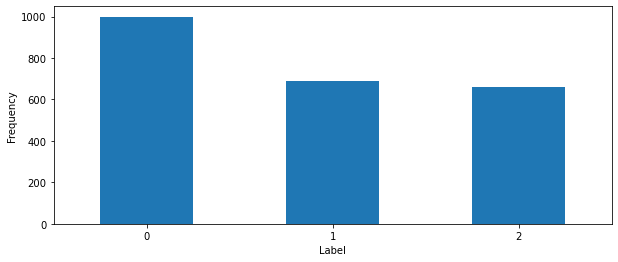

In [19]:
newFile["Label"].value_counts().sort_index().plot(figsize = (10,4),kind = "bar",rot = 0)
plt.xlabel("Label")
plt.ylabel("Frequency")

In [20]:
X = newFile.drop('Label',axis = 1)
y = newFile['Label']
X = pd.get_dummies(X, drop_first=True) 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)


Accuracy score: 0.9617021276595744
F1 score: 0.9617021276595744


Text(0.5, 1.0, 'Churn Logistic Regression Model Results')

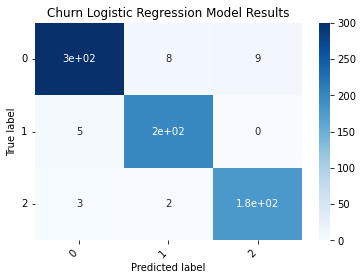

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
clf=RandomForestClassifier()
#n_estimators=800, criterion='gini', max_depth=None,min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None,bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False,class_weight=None
clf.fit(X_train,y_train)
y_predCLF=clf.predict(X_test)
clf.score(X_test, y_test)
conmat = confusion_matrix(y_test, y_predCLF)
val = np.mat(conmat) 

print('Accuracy score:',accuracy_score(y_test, y_predCLF))
print('F1 score:',f1_score(y_test, y_predCLF,average = 'micro'))
#print('roc_auc_score',roc_auc_score(y_test,prob_y_3) )

classnames = list(set(y_train))

df_cm = pd.DataFrame(

        val, index=classnames, columns=classnames, 

    )
plt.figure()

heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')

plt.xlabel('Predicted label')

plt.title('Churn Logistic Regression Model Results')


Accuracy score: 0.9744680851063829
F1 score: 0.9744680851063829


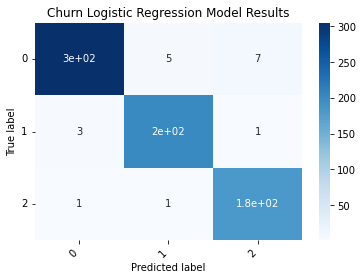

In [24]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
y_predGB = nb.predict(X_test)
prob_y_3 = nb.predict_proba(X_test)
prob_y_3 = [p[1] for p in prob_y_3]
#rint('ROCAUC score:',roc_auc_score(y_test, y_pred))
#print('Recall:',recall_score(y_test, y_predGB,pos_label = "Accept",average='micro'))
print('Accuracy score:',accuracy_score(y_test, y_predGB))
print('F1 score:',f1_score(y_test, y_predGB,average='micro'))
#print('roc_auc_score',roc_auc_score(y_test,prob_y_3) )

conmat = confusion_matrix(y_test, y_predGB)
val = np.mat(conmat) 

classnames = list(set(y_train))

df_cm = pd.DataFrame(

        val, index=classnames, columns=classnames, 

    )
plt.figure()

heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')

plt.xlabel('Predicted label')

plt.title('Churn Logistic Regression Model Results')

plt.show()  